# <center> SENTIMENT ANALYSIS PROJECT (II)<center>

## 2. Exploratory Data Analysis (EDA)

Here, I will do an Exploratory Data Analysis. I will look at the features.

In [47]:
# import necessary libraries

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") # set style

import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from wordcloud import WordCloud, STOPWORDS

In [48]:
# read the data into a DataFrame

df = pd.read_csv('1_wrangled.csv', index_col=0)
df.head()

,sex,rating,product,review,review_date,reviewer_id,clean_text
0,f,5.0,service,"İstanbul'da en sevdiğim mekan, analog dostu. M...",2017-03-08,44720,istanbulda sevdigim mekan analog dostu minicik...
1,f,5.0,studio,KESİNLİKLE ÇOK GÜZEL BİR STÜDYO,2017-10-17,46945,kesinlikle cok guzel bir studyo
2,f,5.0,service,Burayı hep sevdim,2017-01-03,92805,buray sevdim
3,m,5.0,wedding,"Düğün fotoğrafı için gitmiştik, çok güzel çeki...",2017-01-19,51670,dugun fotograf icin gitmistik cok guzel cekiml...
4,f,2.0,service,O kadar iyi diil tabi. Isim var sadece,2017-11-05,79719,kadar iyi diil tabi isim var sadece


In [49]:
# check for any remaining null values
df.isnull().sum()

sex            0
rating         0
product        0
review         0
review_date    0
reviewer_id    0
clean_text     1
dtype: int64

In [50]:
# drop and check again
df.dropna(inplace=True)
df.isnull().sum()

sex            0
rating         0
product        0
review         0
review_date    0
reviewer_id    0
clean_text     0
dtype: int64

### a. 'review_date'

In [51]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 4128
Data columns (total 7 columns):
sex            1063 non-null object
rating         1063 non-null float64
product        1063 non-null object
review         1063 non-null object
review_date    1063 non-null object
reviewer_id    1063 non-null int64
clean_text     1063 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 66.4+ KB


In [52]:
# convert to datetime after reading the file
df['review_date'] = pd.to_datetime(df['review_date']) 

# check the dates covered
print(df['review_date'].min(), '-', df['review_date'].max())

2017-01-01 00:00:00 - 2017-12-31 00:00:00


The data covers the period between January 1st, 2017 and December 31st, 2017. Here is the plot of number of reviews by month:

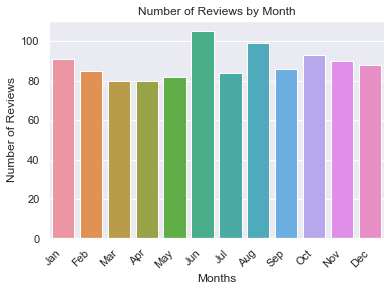

In [53]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['review_month'] = df.review_date.dt.strftime('%b')
mt = df.review_month.value_counts().reindex(months)
mt_figure = sns.barplot(x = mt.index, y = mt.values)
mt_figure.set(title = 'Number of Reviews by Month')
mt_figure.set(xlabel = 'Months')
mt_figure.set(ylabel = 'Number of Reviews')
mt_figure.set_xticklabels(mt_figure.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The number of reviews show slight decrease towards spring and there is an increase in summer months.

### b. 'rating'

In [54]:
# check the values of 'rating' columnn
df.rating.value_counts()

5.0    783
1.0    160
3.0     42
4.0     42
2.0     36
Name: rating, dtype: int64

Let's see it in a plot.

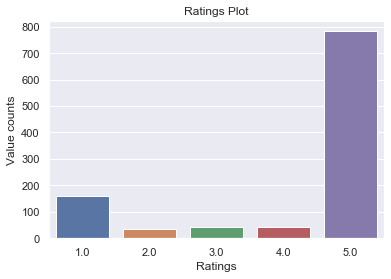

In [55]:
rt = df.rating.value_counts()
my_figure = sns.barplot(x = rt.index, y = rt.values)
my_figure.set(title = 'Ratings Plot')
my_figure.set(xlabel = 'Ratings')
my_figure.set(ylabel = 'Value counts')
plt.show()

There is some imbalance here. Most of the ratings are 5.0. There are not much ratings in the middle range, i.e. in range 2.0-4.0.

I will categorize 'rating' values > 3 as 1 and 'rating' values <= 3 as 0 to do a binary classification. 

In [56]:
df['rating'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)
df.sample(5) #check random 5 rows

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month
1775,f,0,service,Adamlar dolandırıcı. Uzak durun.,2017-09-07,73043,adamlar dolandrc uzak durun,Sep
671,m,1,price,Bu işi biliyorlar ama fiyat konusunda tavsiye ...,2017-07-12,110432,isi biliyorlar fiyat konusunda tavsiye edemem,Jul
3681,f,1,art,"Okul fotoğraflarımızı çektirdik, çok memnun ka...",2017-02-08,106727,okul fotograflarmz cektirdik cok memnun kaldk,Feb
333,f,1,passport,Ben ilk defa vesikalık fotografimi cercevelett...,2017-03-24,47509,ben ilk vesikalk fotografimi cercevelettim gul...,Mar
1342,f,1,service,Göstermiş olduğunuz ilgiye çok teşekkür ederim...,2017-07-17,26236,gostermis oldugunuz ilgiye cok tesekkur ederim...,Jul


In [57]:
# see the values of 'rating' as a percentage
df.rating.value_counts() / len(df.rating) * 100

1    77.610536
0    22.389464
Name: rating, dtype: float64

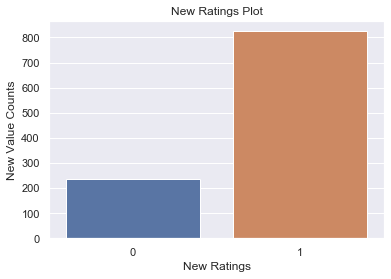

In [58]:
# show the new plot
ov = df.rating.value_counts()
new_figure = sns.barplot(x = ov.index, y = ov.values)
new_figure.set(title = 'New Ratings Plot')
new_figure.set(xlabel = 'New Ratings')
new_figure.set(ylabel = 'New Value Counts')
plt.show()

A pie plot will provide a better visualization of the new rating ratios:

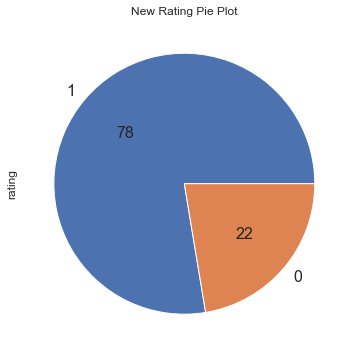

In [59]:
df['rating'].value_counts().plot.pie(autopct='%.0f', fontsize=16, figsize=(6, 6))
plt.title('New Rating Pie Plot')
plt.show()

78% of the reviews are positive.

Here, I am going to look at the monthly ratio of positive reviews.

In [60]:
reviews_by_month = df.groupby(['review_month']).agg({'rating':['size', 'sum']})
reviews_by_month.columns = [' '.join(col).strip() for col in reviews_by_month.columns.values]
reviews_by_month = reviews_by_month.reindex(months)
reviews_by_month['% of Positive Review'] = [x/y for x,y in zip(reviews_by_month['rating sum'], 
                                                              reviews_by_month['rating size'])]
reviews_by_month.columns = ['Number_Total_Reviews', 'Number_Positive_Reviews', 'Ratio_Positive_Reviews']
reviews_by_month

,Number_Total_Reviews,Number_Positive_Reviews,Ratio_Positive_Reviews
review_month,,,
Jan,91,61,0.670330
Feb,85,57,0.670588
Mar,80,63,0.787500
Apr,80,75,0.937500
May,82,71,0.865854
Jun,105,68,0.647619
Jul,84,59,0.702381
Aug,99,73,0.737374
Sep,86,69,0.802326


Let's see this in a plot.

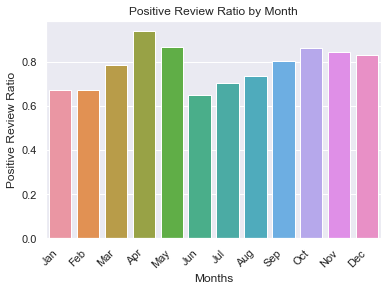

In [61]:
ratio_figure = sns.barplot(x = reviews_by_month.index, 
                         y = reviews_by_month.Ratio_Positive_Reviews.values)
ratio_figure.set(title = 'Positive Review Ratio by Month')
ratio_figure.set(xlabel = 'Months')
ratio_figure.set(ylabel = 'Positive Review Ratio')
ratio_figure.set_xticklabels(mt_figure.get_xticklabels(), 
                             rotation=45, horizontalalignment='right')
plt.show()

There is an increase around April. Later on, there is a  steady increase in number of positive reviews towards winter. 

### c. 'sex'

In [62]:
df.sex.value_counts()/len(df)*100

m    51.175917
f    48.824083
Name: sex, dtype: float64

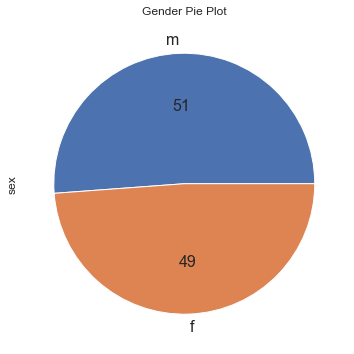

In [63]:
df['sex'].value_counts().plot.pie(autopct='%.0f', fontsize=16, figsize=(6, 6))
plt.title('Gender Pie Plot')
plt.show()

Around 51% of the reviewers are male and 49% are female. Let's check if there is any significant difference between male reviews and female reviews.

In [64]:
reviews_by_sex = df.groupby(['product', 'sex']).agg({'rating':['size', 'sum']})
reviews_by_sex.columns = [' '.join(col).strip() for col in reviews_by_sex.columns.values]
reviews_by_sex['% of Positive Review'] = [x/y for x,y in zip(reviews_by_sex['rating sum'], 
                                                              reviews_by_sex['rating size'])]
reviews_by_sex.columns = ['Number_Total_Reviews', 'Number_Positive_Reviews', 
                       'Ratio_Positive_Reviews']
reviews_by_sex

Number_Total_Reviews  Number_Positive_Reviews  \
product    sex                                                  
art        f                      20                       19   
           m                      15                       15   
camera     f                       4                        1   
engagement f                      19                       18   
           m                       6                        6   
facility   f                       8                        6   
           m                      16                       11   
outdoors   f                       3                        3   
           m                       2                        2   
passport   f                      14                        9   
           m                      14                       10   
price      f                      27                        6   
           m                      19                        5   
self-taken f                       1                        0   
           m                       2                        2   
service    f                     384                      299   
           m                     424                      341   
studio     f                      11                        9   
           m                      15                       14   
wedding    f                      28                       23   
           m                      31                       26   

                Ratio_Positive_Reviews  
product    sex                          
art        f                  0.950000  
           m                  1.000000  
camera     f                  0.250000  
engagement f                  0.947368  
           m                  1.000000  
facility   f                  0.750000  
           m                  0.687500  
outdoors   f                  1.000000  
           m                  1.000000  
passport   f                  0.642857  
           m                  0.714286  
price      f                  0.222222  
           m                  0.263158  
self-taken f                  0.000000  
           m                  1.000000  
service    f                  0.778646  
           m                  0.804245  
studio     f                  0.818182  
           m                  0.933333  
wedding    f                  0.821429  
           m                  0.838710

Here are some facts on this data:  

- All the reviews on camera sales are made by female reviewers. 
- Engagement photos are more reviewed by women.  
- Men made more reviews on facility and service provided.

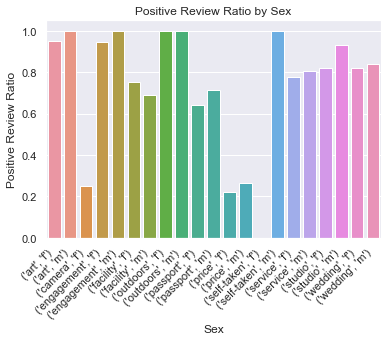

In [65]:
ratio_figure = sns.barplot(x = reviews_by_sex.index, 
                         y = reviews_by_sex.Ratio_Positive_Reviews.values)
ratio_figure.set(title = 'Positive Review Ratio by Sex')
ratio_figure.set(xlabel = 'Sex')
ratio_figure.set(ylabel = 'Positive Review Ratio')
ratio_figure.set_xticklabels(ratio_figure.get_xticklabels(), 
                             rotation=45, horizontalalignment='right')
plt.show()

As mentioned, there are no reviews made by males on camera sales. The only significant difference seems to be in the category 'self-taken'. There are only 3 reviews here. 2 of them are positive and made by males, 1 of them is negative and made by a female. However, we don't have enough data to conclude that female reviews on this category are significantly different than male reviews.

### d. 'reviewer_id'

Let's see if some customers write more reviews:

In [66]:
df['reviewer_id'].value_counts().head(10)

110066    11
93924      9
91529      8
53005      7
44720      5
122928     5
51930      4
79277      4
76922      4
43524      4
Name: reviewer_id, dtype: int64

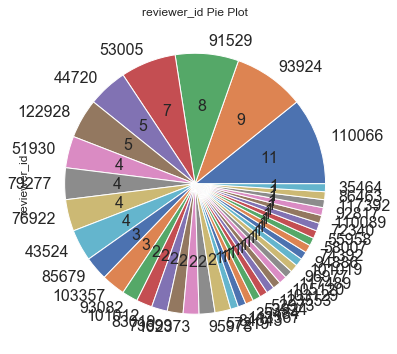

In [67]:
df['reviewer_id'].value_counts().head(40).plot.pie(autopct='%.0f', fontsize=16, figsize=(6, 6))
plt.title('reviewer_id Pie Plot')
plt.show()

In [68]:
# check to see reviews of one of the frequent reviewers

one_frequent_reviewer = df['reviewer_id'] == 44720
df[one_frequent_reviewer]

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month
0,f,1,service,"İstanbul'da en sevdiğim mekan, analog dostu. M...",2017-03-08,44720,istanbulda sevdigim mekan analog dostu minicik...,Mar
118,f,1,service,Kendini kanıtlamış bir Fotoğraf Stüdyosu Herke...,2017-05-07,44720,kendini kantlams bir fotograf studyosu herkese...,May
185,f,1,service,İşini düzgün yapan bir işletme....,2017-08-06,44720,isini duzgun yapan bir isletme,Aug
1146,f,1,service,Filmlerinizi yıkatmak için bir yer arıyorsanız...,2017-12-07,44720,filmlerinizi ykatmak icin bir yer aryorsanz is...,Dec
1182,f,1,price,Film yıkatmak için öğrenci dostu mekan. Renkli...,2017-01-09,44720,film ykatmak icin ogrenci dostu mekan renkli b...,Jan


These reviewers provide valuable feedback by writing more reviews. It would be beneficial to keep track of these customers.

### e. 'product'

Now, we are going to check if some products / services get more reviews.

In [69]:
df['product'].value_counts() / len(df) * 100 

service       76.011289
wedding        5.550329
price          4.327375
art            3.292568
passport       2.634055
studio         2.445908
engagement     2.351834
facility       2.257761
outdoors       0.470367
camera         0.376294
self-taken     0.282220
Name: product, dtype: float64

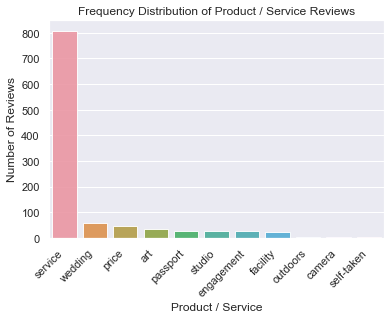

In [70]:
product_count = df['product'].value_counts()
product_figure = sns.barplot(x = product_count.index, y = product_count.values, alpha=0.9)
product_figure.set(title = 'Frequency Distribution of Product / Service Reviews')
product_figure.set(ylabel = 'Number of Reviews')
product_figure.set(xlabel ='Product / Service')
product_figure.set_xticklabels(product_figure.get_xticklabels(), 
                             rotation=45, horizontalalignment='right')
plt.show()

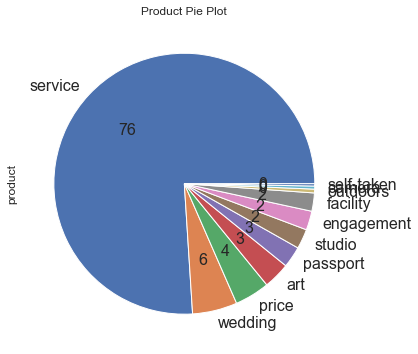

In [71]:
df['product'].value_counts().plot.pie(autopct='%.0f', fontsize=16, figsize=(6, 6))
plt.title('Product Pie Plot')
plt.show()

Most reviews are about the service provided, i.e. customer satisfaction. Not that much, but wedding photos and the prices are also two important categories that are reviewed relatively often.

Next, I am going to look at the positive review ratio of each product / service type. I am taking also into account how much a product / service is reviewed.

In [72]:
reviews_by_product = df.groupby(['product']).agg({'rating':['size', 'sum']})
reviews_by_product.columns = [' '.join(col).strip() for col in reviews_by_product.columns.values]
reviews_by_product['% of Positive Review'] = [x/y * 100 for x,y in zip(reviews_by_product['rating sum'], 
                                                              reviews_by_product['rating size'])]
reviews_by_product['% of Product Review'] = reviews_by_product['rating size'] / len(df) * 100
reviews_by_product.columns = ['Number_Total_Reviews', 'Number_Positive_Reviews', 
                              'Ratio_Positive_Reviews', 'Reviewed_Ratio']
reviews_by_product = reviews_by_product.reindex().sort_values(by='Ratio_Positive_Reviews')

reviews_by_product

,Number_Total_Reviews,Number_Positive_Reviews,Ratio_Positive_Reviews,Reviewed_Ratio
product,,,,
price,46,11,23.913043,4.327375
camera,4,1,25.000000,0.376294
self-taken,3,2,66.666667,0.282220
passport,28,19,67.857143,2.634055
facility,24,17,70.833333,2.257761
service,808,640,79.207921,76.011289
wedding,59,49,83.050847,5.550329
studio,26,23,88.461538,2.445908
engagement,25,24,96.000000,2.351834


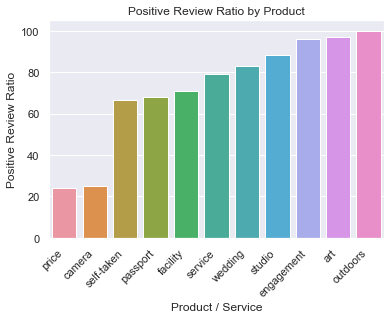

In [73]:
product_figure = sns.barplot(x = reviews_by_product.index, 
                         y = reviews_by_product.Ratio_Positive_Reviews.values)
product_figure.set(title = 'Positive Review Ratio by Product')
product_figure.set(xlabel = 'Product / Service' )
product_figure.set(ylabel = 'Positive Review Ratio')
product_figure.set_xticklabels(product_figure.get_xticklabels(), 
                             rotation=45, horizontalalignment='right')
plt.show()

Prices got the lowest rating, but they are reviewed only by 1% of the reviewers. Similarly, outdoors photo shoots got the highest rating and they are reviewed by only .5% of the reviewers. Around 76% of the reviews are on the service provided, i.e. customer satisfaction where percentage of the positive reviews are 79%.

Here, I am going to look at monthly reviews of the most reviewed products / services: 

In [74]:
product_types = ['service', 'wedding', 'price']
product_types

['service', 'wedding', 'price']

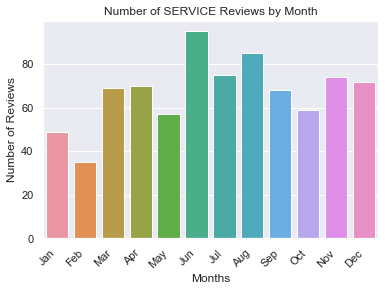

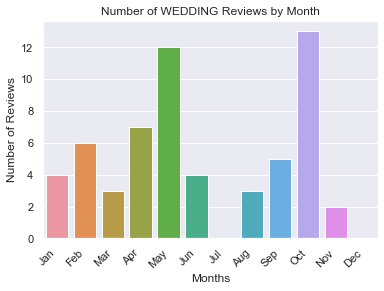

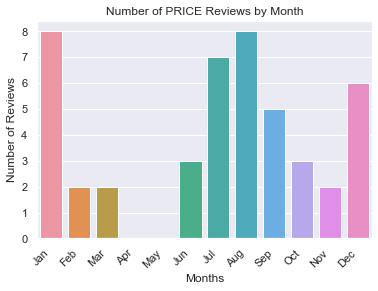

In [75]:
for p in product_types:
    is_type = df['product'] == p
    p_df = df[is_type]
    prod = p_df.review_month.value_counts().reindex(months)
    prod_figure = sns.barplot(x = prod.index, y = prod.values)
    p_upper = p.upper()
    ttl = 'Number of ' + p_upper + ' Reviews by Month'
    prod_figure.set(title = ttl)
    prod_figure.set(xlabel = 'Months')
    prod_figure.set(ylabel = 'Number of Reviews')
    prod_figure.set_xticklabels(prod_figure.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

- Being the major review type, Service / Product monthly reviews bar plot is similar to total reviews by month plot at the top of this page.  
- Review highs on the prices might indicate price changes in July and December. 

### f. 'review'

Here, I am going to look at the 'review' column. I will start with review lenghts.

In [76]:
# Start with number of letters

length_reviews = df.review.str.len()
print('\n longest review: ', max(length_reviews), 'letters', '\n shortest review: ', min(length_reviews), 'letters')


 longest review:  2211 letters 
 shortest review:  3 letters


In [77]:
# Continue with number of words

word_tokens = [nltk.word_tokenize(rev) for rev in df.review]
len_tokens = []
for i in range (len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))
df['review_length'] = len_tokens
df.head()

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month,review_length
0,f,1,service,"İstanbul'da en sevdiğim mekan, analog dostu. M...",2017-03-08,44720,istanbulda sevdigim mekan analog dostu minicik...,Mar,21
1,f,1,studio,KESİNLİKLE ÇOK GÜZEL BİR STÜDYO,2017-10-17,46945,kesinlikle cok guzel bir studyo,Oct,5
2,f,1,service,Burayı hep sevdim,2017-01-03,92805,buray sevdim,Jan,3
3,m,1,wedding,"Düğün fotoğrafı için gitmiştik, çok güzel çeki...",2017-01-19,51670,dugun fotograf icin gitmistik cok guzel cekiml...,Jan,19
4,f,0,service,O kadar iyi diil tabi. Isim var sadece,2017-11-05,79719,kadar iyi diil tabi isim var sadece,Nov,9


In [78]:
df['review_length'].describe()

count    1063.000000
mean       14.034807
std        19.958000
min         1.000000
25%         5.000000
50%         8.000000
75%        16.000000
max       317.000000
Name: review_length, dtype: float64

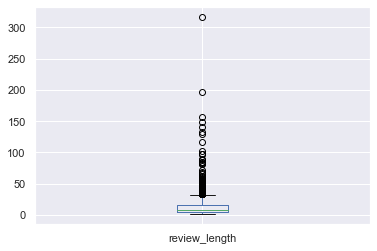

In [79]:
df['review_length'].plot(kind='box')

Minimum review length is 1 word, and the maximum is 317 words. On average, reviews are around 14 words long.

Let's look only at positive reviews.

In [80]:
is_positive = df.rating == 1
pos_df = df[is_positive]
pos_df.head()

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month,review_length
0,f,1,service,"İstanbul'da en sevdiğim mekan, analog dostu. M...",2017-03-08,44720,istanbulda sevdigim mekan analog dostu minicik...,Mar,21
1,f,1,studio,KESİNLİKLE ÇOK GÜZEL BİR STÜDYO,2017-10-17,46945,kesinlikle cok guzel bir studyo,Oct,5
2,f,1,service,Burayı hep sevdim,2017-01-03,92805,buray sevdim,Jan,3
3,m,1,wedding,"Düğün fotoğrafı için gitmiştik, çok güzel çeki...",2017-01-19,51670,dugun fotograf icin gitmistik cok guzel cekiml...,Jan,19
5,m,1,engagement,bu kadar renkli bir ekip ile karşılaşacağımı t...,2017-05-12,81391,kadar renkli bir ekip karslasacagm tahmin etmi...,May,28


In [81]:
pos_df['review_length'].describe()

count    825.000000
mean      12.156364
std       16.759102
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max      317.000000
Name: review_length, dtype: float64

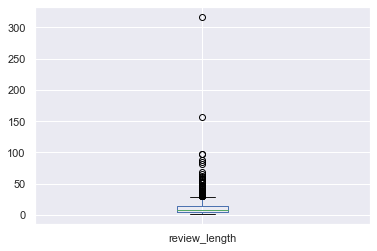

In [82]:
pos_df['review_length'].plot(kind='box')

Minimum positive review length is 1 word, and the maximum is 317 words. On average, positive reviews are around 12 words long. Let's see a word cloud to get a picture of which words were used the most in positive reviews.

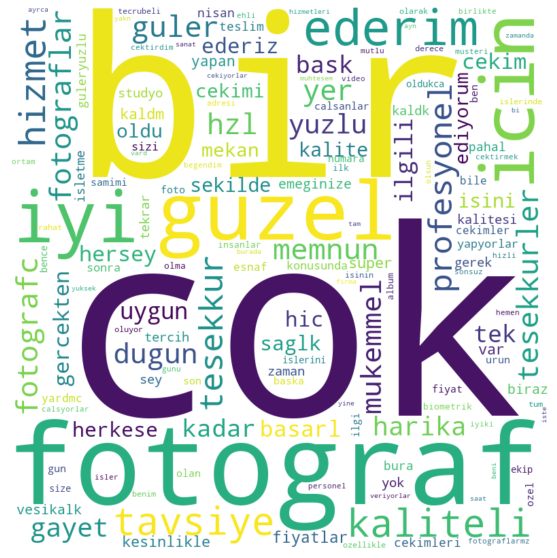

In [136]:
big_list = ''
big_list = [''.join(row) for row in pos_df.clean_text]
big_string = ','.join(big_list)

my_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations=False,
                min_font_size = 10).generate(big_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

I will use the wordcloud above to restrict words that do not contribute to the analysis. 

In [141]:
pos_list = ['cok', 'bir', 'fotograf', 'icin', 'ederim', 'hizmet', 'fotograflar']

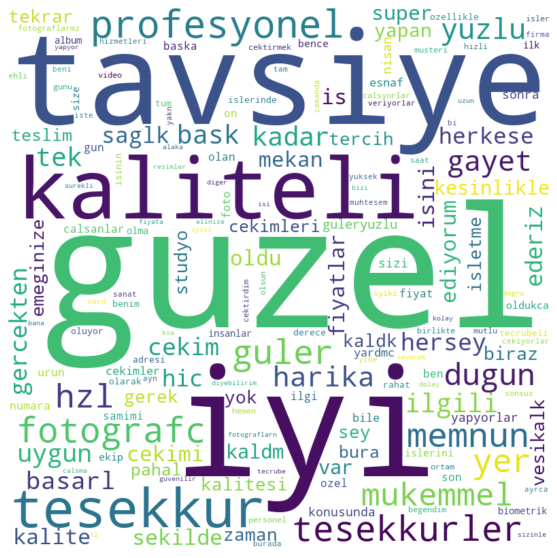

In [142]:
big_list = ''
big_list = [''.join(row) for row in pos_df.clean_text]
big_string = ','.join(big_list)

my_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations=False,
                stopwords=pos_list,
                min_font_size = 10).generate(big_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Now, I will find and plot the most frequent 10 words together with their frequencies.

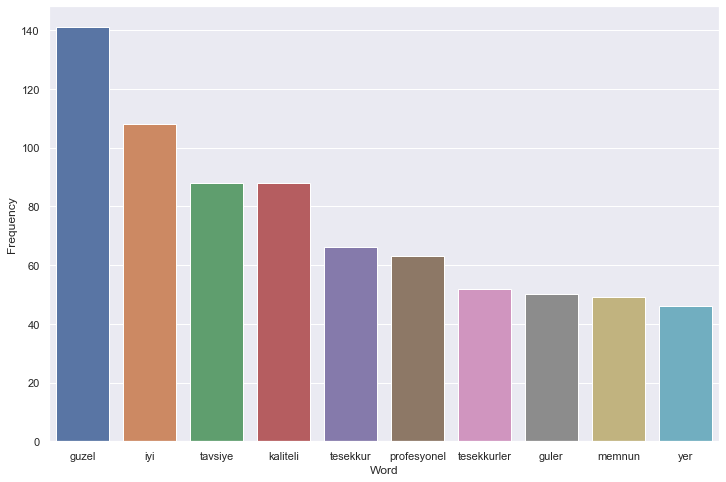

In [145]:
top_N = 100
cleaned_text = [str(txt) for text in pos_df['clean_text'] for txt in text.split(' ') 
                             if len(txt)>2 and txt not in pos_list]

word_dist = nltk.FreqDist(cleaned_text)
pos_rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

plt.figure(figsize=(12,8))
sns.set()
ax = sns.barplot(x="Word", y="Frequency", data=pos_rslt.head(10))

Translated to English; the words beautiful, good, quality, recommend, thanks, professional, smiling, glad and fast are used the most in positive reviews.

In [146]:
is_negative = df.rating == 0
neg_df = df[is_negative]
neg_df.head()

,sex,rating,product,review,review_date,reviewer_id,clean_text,review_month,review_length
4,f,0,service,O kadar iyi diil tabi. Isim var sadece,2017-11-05,79719,kadar iyi diil tabi isim var sadece,Nov,9
6,f,0,price,Malesef fiyat bilgisi almadan girmiş bulundum ...,2017-12-02,74573,malesef fiyat bilgisi almadan girmis bulundum ...,Dec,18
18,m,0,service,Fotoğraf kalitesi beni oldukça memnun etti. Bi...,2017-06-28,23237,fotograf kalitesi beni oldukca memnun etti top...,Jun,37
34,f,0,service,Sıradan bir fotoğrafçı,2017-10-19,67670,sradan bir fotografc,Oct,3
35,m,0,service,"Çömezlik hat boyu, napolyon ne demiş ""Para,par...",2017-05-24,110800,comezlik hat boyu napolyon demis `` para para ...,May,27


In [147]:
neg_df['review_length'].describe()

count    238.000000
mean      20.546218
std       27.450069
min        1.000000
25%        6.000000
50%       11.000000
75%       23.750000
max      197.000000
Name: review_length, dtype: float64

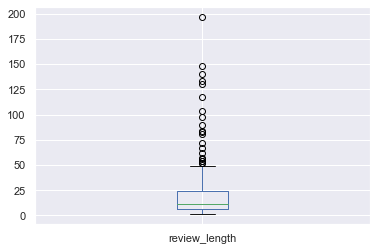

In [148]:
neg_df['review_length'].plot(kind='box')

Minimum negative review length is 1 words, and the maximum is 197 words. On average, negative reviews are around 21 words long. We can say that negative reviews tend to be longer, as you might expect. Let's see a word cloud to get a picture of which words were used the most in negative reviews.

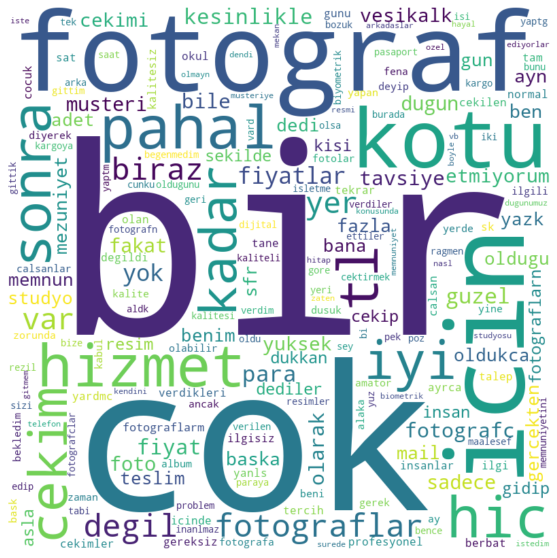

In [149]:
big_list = ''
big_list = [''.join(row) for row in neg_df.clean_text]
big_string = ','.join(big_list)

my_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations=False,
                min_font_size = 10).generate(big_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Similarly, I will use the wordcloud above to restrict words that do not contribute to the analysis. Then, I will find and plot the most frequent 10 words together with their frequencies.

In [153]:
neg_list = ['cok', 'bir', 'fotograf', 'icin', 'hizmet', 'fotograflar', 'sonra', 'cekim', 'kadar',  \
                'degil', 'biraz', 'var', 'yok', 'iyi', 'guzel', 'tavsiye', 'olarak', 'sadece', 'fotografc']

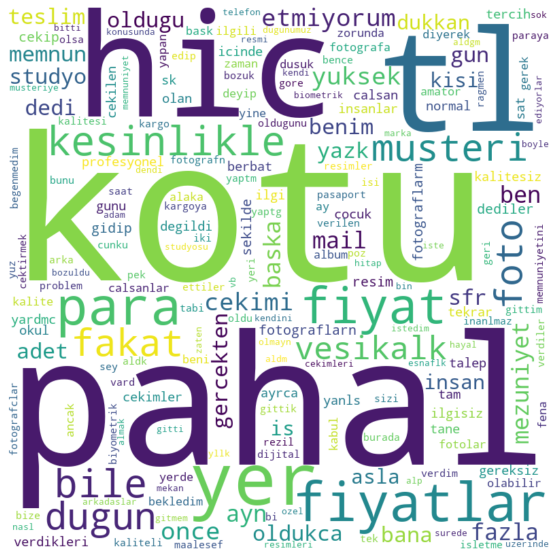

In [154]:
big_list = ''
big_list = [''.join(row) for row in neg_df.clean_text]
big_string = ','.join(big_list)

my_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations=False,
                stopwords=neg_list,
                min_font_size = 10).generate(big_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

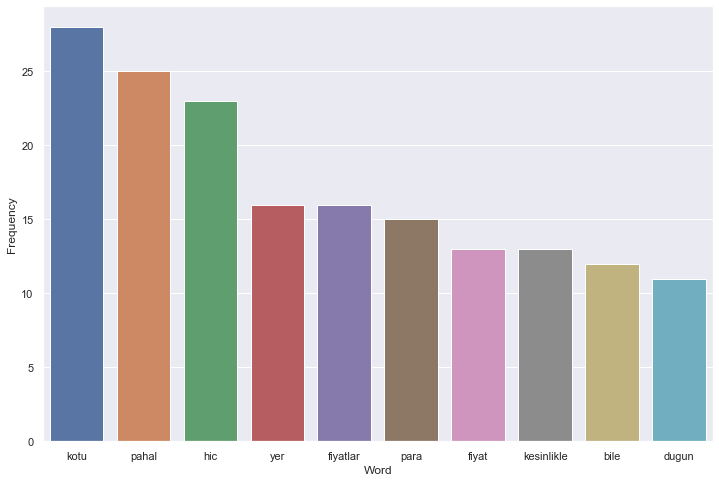

In [155]:
top_N = 100
cleaned_text = [str(txt) for text in neg_df['clean_text'] for txt in text.split(' ') 
                if len(txt)>2 and txt not in neg_list]

word_dist = nltk.FreqDist(cleaned_text)
neg_rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(12,8))
sns.set()
ax = sns.barplot(x="Word", y="Frequency", data=neg_rslt.head(10))

Translated to English; the words bad, expensive, never, prices, place, absolutely, money, even and wedding are used the most in negative reviews.

I will add the most common words between positive and negative reviews to the list of stopwords.

In [ ]:
stopword_list= stopwords.words('turkish')
my_list = ['cok', 'bir', 'fotograf', 'icin', 'ederim', 'hizmet', 'fotograflar']
for word in my_list:
    stopword_list.append(word)

In [ ]:
def remove_stopwords(text, stopword_list):
    
    '''This function removes words in the given stopword_list from the given text and returns filtered_text'''
    
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [ ]:
df['clean_text'] = df['clean_text'].map(lambda x: remove_stopwords(x, stopword_list = stopword_list))

I will save the cleaned text to disk for further analysis.

In [ ]:
df.to_csv('2_explored.csv', sep=',', encoding='utf-8')

### EDA Summary 

Here, I inspected the features:

- ‘review_date’
    - spans Jan 1st - Dec 31st 2017,
    - number of reviews show slight decrease towards spring and an increase in summer months,


- ‘rating’
    - categorized 'rating' column as 0 and 1 to help reduce imbalance,
    - around 78% of the reviews are positive,
    - there is an increase in number of positive reviews around April, 
    - there also is a steady increase towards winter,


- ‘sex’
    - around 51% of the reviewers are male,
    - ratio of positive reviews does not significantly differ by gender,


- 'reviewer_id'
    - there are reviewers who provide valuable feedback by writing more reviews,
    - it would be beneficial for the company to keep track of these customers,


- ‘product’
    - around 76% of the reviews are about the service provided, i.e. customer satisfaction (around 79% positive),  
    - wedding photos (around 83% positive) and prices (around 24% positive) are also two important categories reviewed relatively often (around 6% and 4% respectively),
    - prices got the lowest rating but they are reviewed only by 4% of the reviewers, 
    - similarly, outdoors photo shoots got the highest rating (100%) and they are reviewed by only .5% of the reviewers, 
    - review highs on the prices might indicate price changes in July and December, 


- ‘review’
    - minimum review length is 1 word, and the maximum is 317 words. On average, reviews are around 14 words long,
    - negative reviews tend to be longer, as expected,
    - wordclouds show most frequent words are shared between positive and negative reviews, after eliminating these:
    - the words beautiful, good, quality, recommend, thanks, professional, smiling, glad and fast are used the most in positive reviews (translated to English),
    - the words bad, expensive, never, prices, place, absolutely, money, even and wedding are used the most in negative reviews (translated to English).